In [ ]:
# BM20A6100 Project work Forecasting power for predicting temperature using multivariate data
# Emma Hirvonen, Helmi Toropainen, Jan Vymazal

# Import dataset with Pandas
import pandas as pd
file_path = "sample_data/DailyDelhiClimateTrain.csv"
climate_data = pd.read_csv(file_path, parse_dates=["date"])
climate_data = climate_data.set_index("date") # use date as index
print(climate_data.info())
print(climate_data.head())
print(climate_data.describe())
# Data consists of 4 variables for 1462 samples, no missing values

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2013-01-01 to 2017-01-01
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1462 non-null   float64
 1   humidity      1462 non-null   float64
 2   wind_speed    1462 non-null   float64
 3   meanpressure  1462 non-null   float64
dtypes: float64(4)
memory usage: 57.1 KB
None
             meantemp   humidity  wind_speed  meanpressure
date                                                      
2013-01-01  10.000000  84.500000    0.000000   1015.666667
2013-01-02   7.400000  92.000000    2.980000   1017.800000
2013-01-03   7.166667  87.000000    4.633333   1018.666667
2013-01-04   8.666667  71.333333    1.233333   1017.166667
2013-01-05   6.000000  86.833333    3.700000   1016.500000
          meantemp     humidity   wind_speed  meanpressure
count  1462.000000  1462.000000  1462.000000   1462.000000
mean     25.495521    60.771702     6.802

<Figure size 640x480 with 0 Axes>

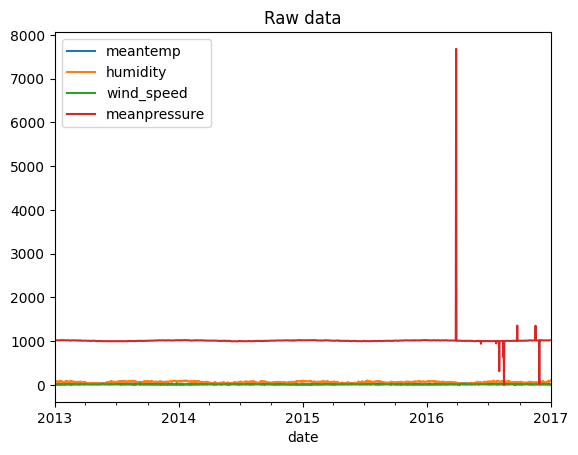

<Figure size 640x480 with 0 Axes>

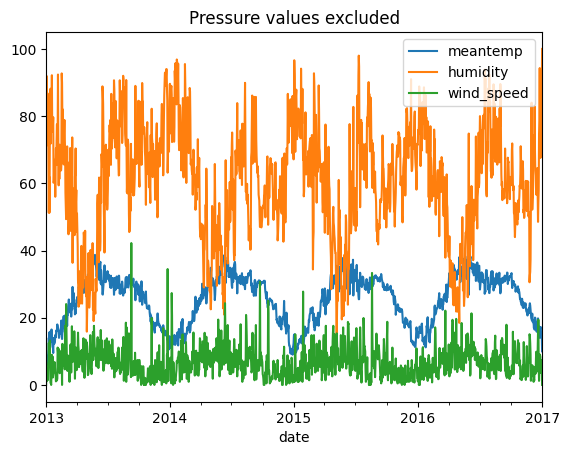

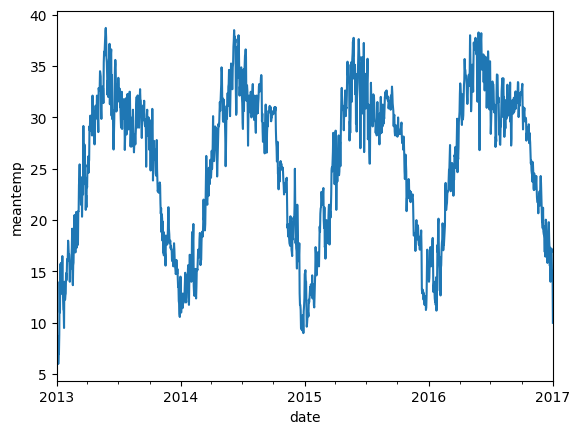

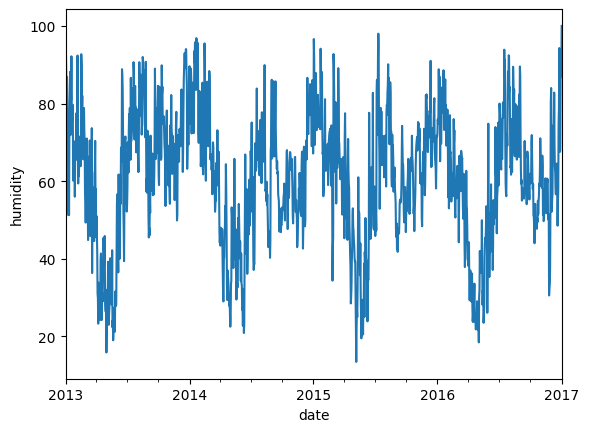

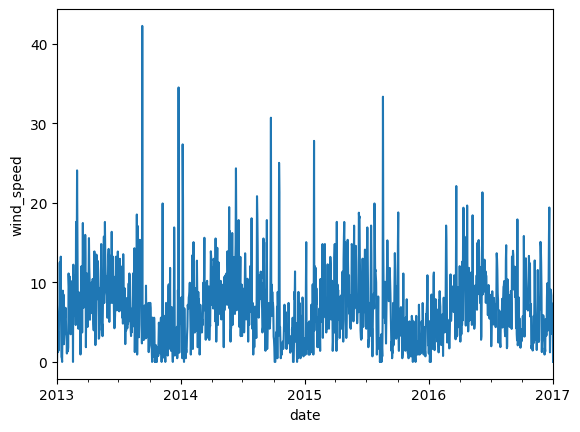

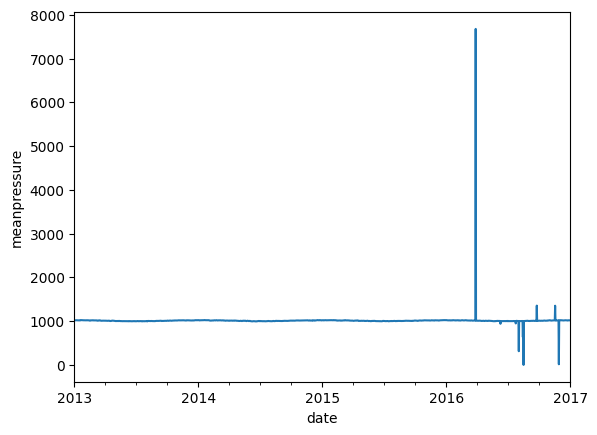

In [ ]:
# Visualise timerseries for all variables
import matplotlib.pyplot as plt

plt.figure()
climate_data.plot()
plt.title("Raw data")
plt.show()

plt.figure()
climate_data.drop("meanpressure", axis=1).plot()
plt.title("Pressure values excluded")
plt.show()

for var in climate_data.columns:
  plt.figure()
  climate_data[var].plot()
  plt.ylabel(var)
  plt.show()

In [ ]:
# remove outlier
print(climate_data[climate_data["meanpressure"] > 2000]) # outlier?
climate_data_clean = climate_data.copy()

t = pd.Timestamp(climate_data_clean[climate_data_clean["meanpressure"] > 2000].index.date[0]) # outlier date
i = climate_data_clean.index.get_loc(t) # outlier index

new_pressure = (climate_data_clean.iloc[i+1].get("meanpressure")+climate_data_clean.iloc[i-1].get("meanpressure"))/2 # average of prev and next value

climate_data_clean.loc[t, "meanpressure"] = new_pressure

             meantemp  humidity  wind_speed  meanpressure
date                                                     
2016-03-28  25.933333      52.8    6.546667   7679.333333


In [ ]:
import datetime

<Figure size 640x480 with 0 Axes>

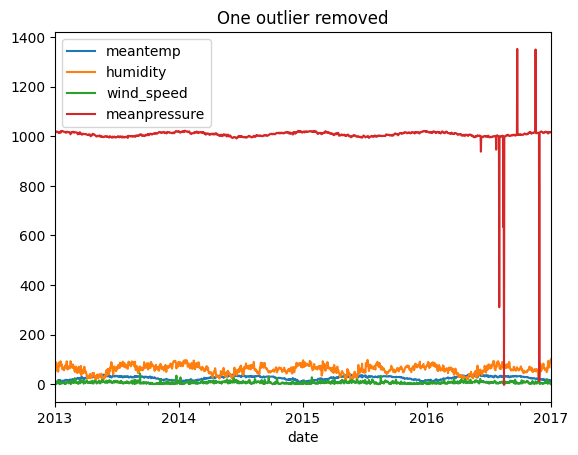

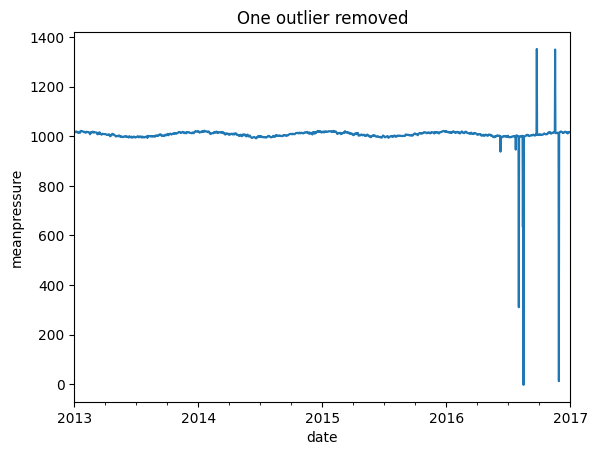

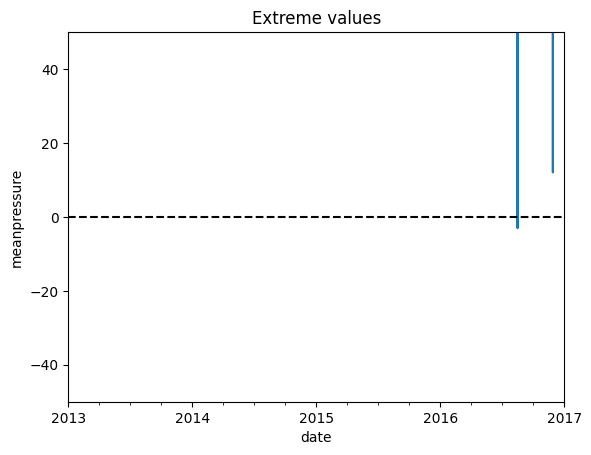

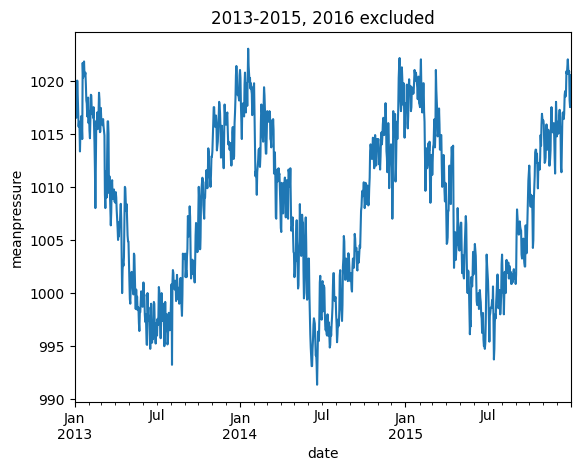

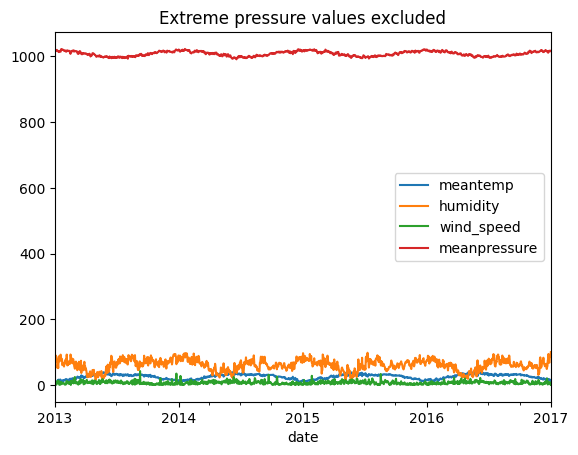

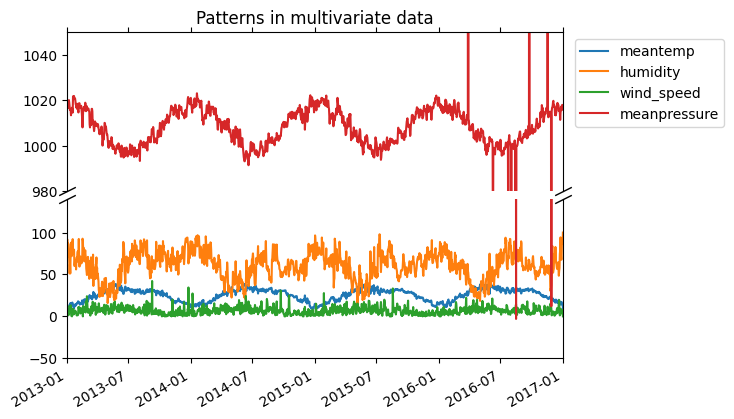

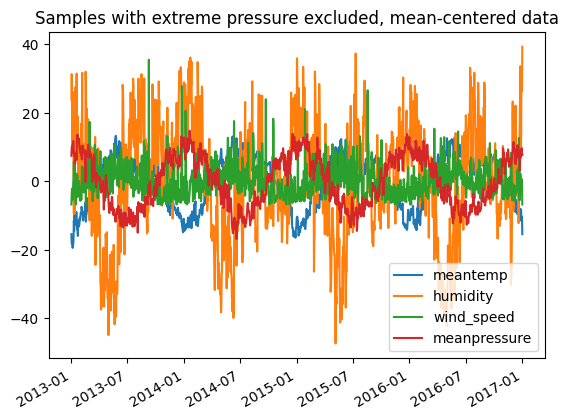

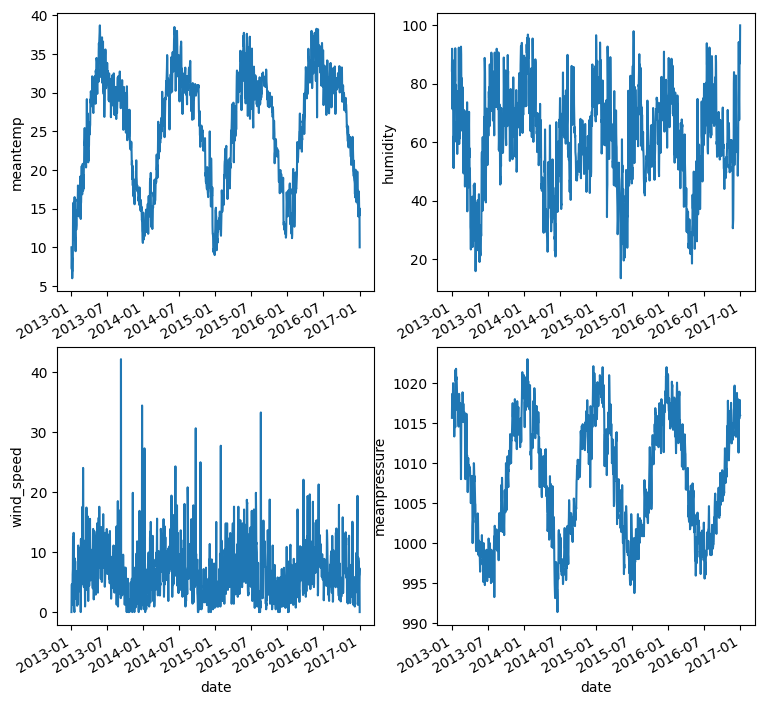

In [ ]:
# new plots without outlier
plt.figure()
climate_data_clean.plot()
plt.title("One outlier removed")
plt.show()

plt.figure()
climate_data_clean["meanpressure"].plot()
plt.ylabel("meanpressure")
plt.title("One outlier removed")
plt.show()

# negative pressure?
plt.figure()
climate_data["meanpressure"].plot()
plt.ylabel("meanpressure")
plt.axhline(y=0, color='k', linestyle='--')
plt.ylim(-50, 50)
plt.title("Extreme values")
plt.show()

# pressure values from 2013-01-01 to 2016-01-01 (2016 seems unreliable?)
plt.figure()
climate_data.iloc[0:365+365+365, 3].plot()
plt.ylabel("meanpressure")
plt.title("2013-2015, 2016 excluded")
plt.show()
# all values should be between ~990-1030?

# skip outlier values
climate_data.drop("meanpressure", axis=1).plot()
climate_data.query("990 < meanpressure < 1030")["meanpressure"].plot()
plt.legend()
plt.title("Extreme pressure values excluded")
plt.show()

# broken y-axis (matplotlib documentation)
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.subplots_adjust(hspace=0.05)
plt_data = climate_data#.query("990 < meanpressure < 1030")
ax1.plot(plt_data)
ax1.set_ylim((980, 1050))
ax1.set_xlim([datetime.date(2013, 1, 1), datetime.date(2017, 1, 1)])
ax2.plot(plt_data)
ax2.set_ylim((-50, 140))
ax2.set_xlim([datetime.date(2013, 1, 1), datetime.date(2017, 1, 1)])
ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)
ax2.xaxis.tick_bottom()
ax1.legend(plt_data.columns, bbox_to_anchor=(1.01, 1.0), loc='upper left')
ax1.title.set_text("Patterns in multivariate data")
fig.autofmt_xdate()
d = .5
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)
plt.show()

# mean center data
plt.figure()
plt.plot(climate_data.query("990 < meanpressure < 1030") - climate_data.query("990 < meanpressure < 1030").mean())
plt.gcf().autofmt_xdate()
plt.legend(climate_data.columns)
plt.title("Samples with extreme pressure excluded, mean-centered data")
plt.show()

# subplot of all variables (no mean-centering)
plt.figure(figsize=(9, 9))
for i in range(4):
  plt.subplot(2,2,i+1)
  climate_data.query("990 < meanpressure < 1030").iloc[:, i].plot()
  plt.ylabel(climate_data.columns[i])
plt.show()


In [ ]:
# Remove outliers from meanpressure

dates = climate_data_clean.query("meanpressure < 990 or meanpressure > 1030").index.date

for date in dates:
  t = pd.Timestamp(date)
  i = climate_data_clean.index.get_loc(t)
  new_pressure = (climate_data_clean.iloc[i+1].get("meanpressure")+climate_data_clean.iloc[i-1].get("meanpressure"))/2 # average of prev and next value
  climate_data_clean.loc[t, "meanpressure"] = new_pressure

climate_data = climate_data_clean.copy()



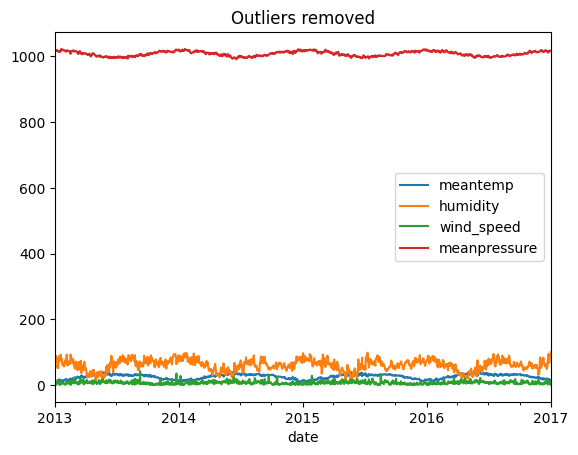

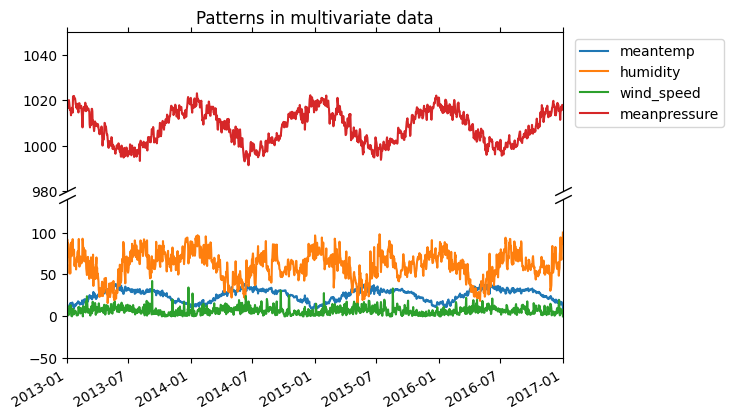

In [ ]:
# Outliers removed
climate_data_clean.plot()
plt.title("Outliers removed")
plt.show()

# broken y-axis (matplotlib documentation)
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.subplots_adjust(hspace=0.05)
plt_data = climate_data_clean
ax1.plot(plt_data)
ax1.set_ylim((980, 1050))
ax1.set_xlim([datetime.date(2013, 1, 1), datetime.date(2017, 1, 1)])
ax2.plot(plt_data)
ax2.set_ylim((-50, 140))
ax2.set_xlim([datetime.date(2013, 1, 1), datetime.date(2017, 1, 1)])
ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)
ax2.xaxis.tick_bottom()
ax1.legend(plt_data.columns, bbox_to_anchor=(1.01, 1.0), loc='upper left')
ax1.title.set_text("Patterns in multivariate data")
fig.autofmt_xdate()
d = .5
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)
plt.show()

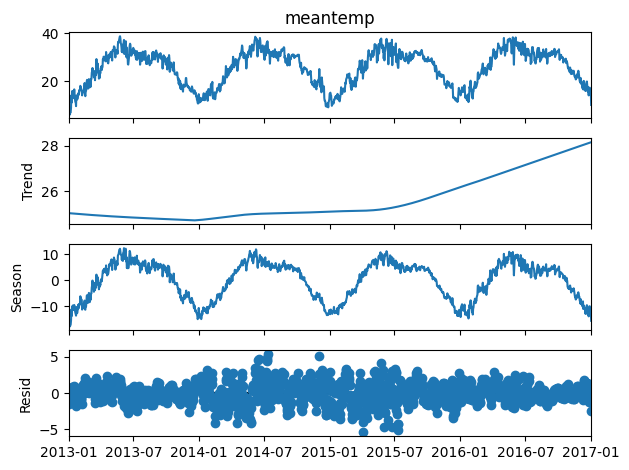

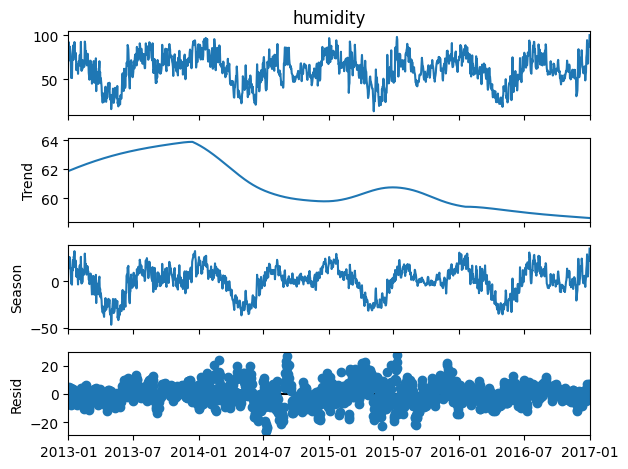

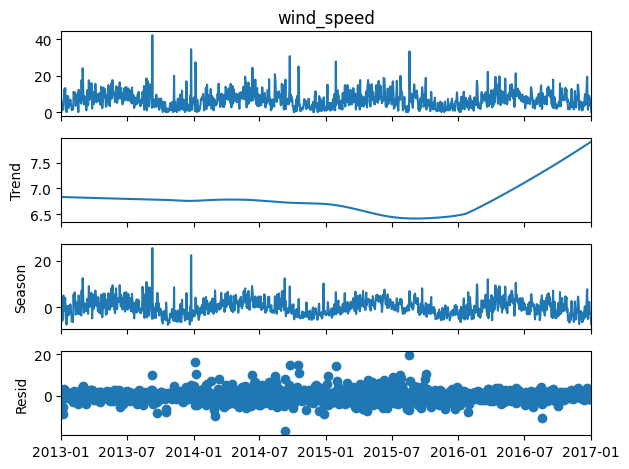

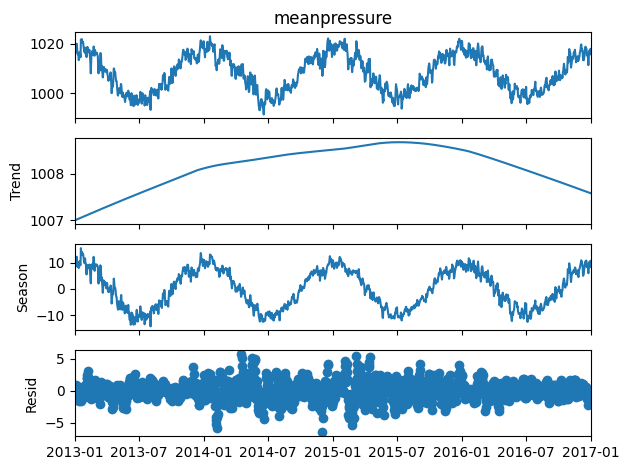

In [ ]:
#Time-series decomposition analysis in long-term trend, seasonality and residuals
#Period 365 because we measure once per day for multiple years
from statsmodels.tsa.seasonal import STL
stl = STL(climate_data["meantemp"], period=365 )
res = stl.fit()
fig = res.plot()

stl = STL(climate_data["humidity"], period=365)
res = stl.fit()
fig = res.plot()

stl = STL(climate_data["wind_speed"], period=365)
res = stl.fit()
fig = res.plot()

stl = STL(climate_data["meanpressure"], period=365)
res = stl.fit()
fig = res.plot()


Text(0.5, 1.0, 'Mean pressure autocorrelation')

<Figure size 640x480 with 0 Axes>

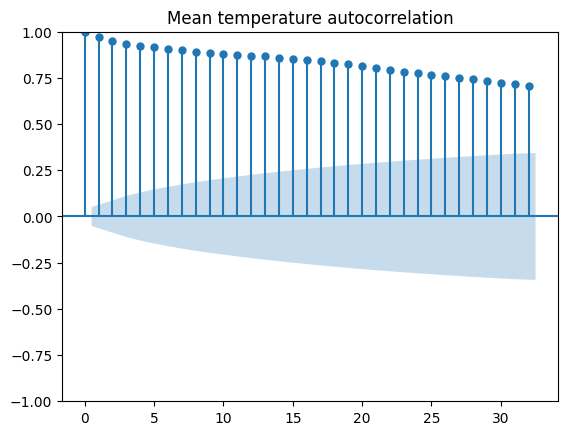

<Figure size 640x480 with 0 Axes>

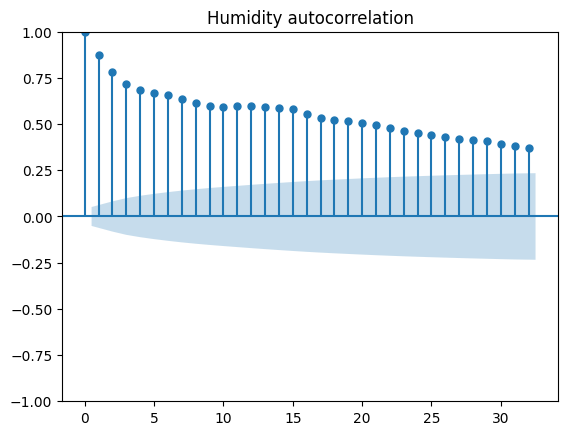

<Figure size 640x480 with 0 Axes>

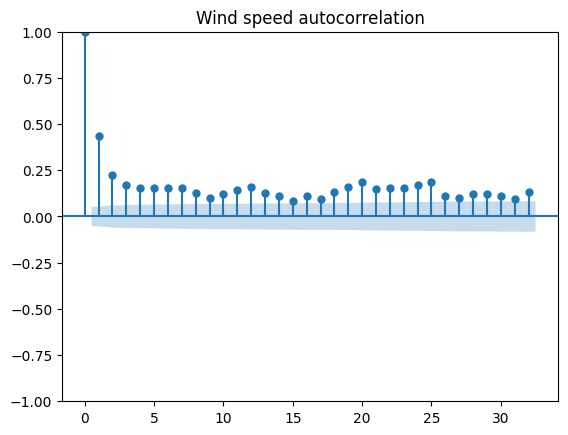

<Figure size 640x480 with 0 Axes>

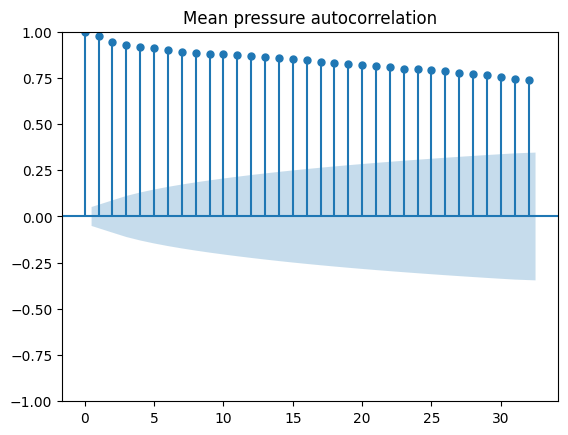

In [ ]:
#Autocorrelation analysis of the dataset
from statsmodels.graphics.tsaplots import plot_acf
plt.figure()
plot_acf(climate_data["meantemp"])
plt.title("Mean temperature autocorrelation")

plt.figure()
plot_acf(climate_data["humidity"])
plt.title("Humidity autocorrelation")

plt.figure()
plot_acf(climate_data["wind_speed"])
plt.title("Wind speed autocorrelation")

plt.figure()
plot_acf(climate_data["meanpressure"])
plt.title("Mean pressure autocorrelation")


In [ ]:
# Basline autoregressive model

import tensorflow as tf
import numpy as np

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers.legacy import SGD, Adam
from tensorflow.keras.optimizers import Adam

In [ ]:
# Build the dataset
T =100
X = []
Y = []
series = climate_data['meantemp']
series = (series-series.mean())/series.std() # normalise
series = series.to_numpy()
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (1362, 100) Y.shape (1362,)


In [ ]:
# Try autoregressive model
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i, x)
model.compile(
    loss='mse',
    optimizer=Adam(learning_rate=0.001)
)

# train
r = model.fit(
    X[:-N//2], Y[:-N//2],
    epochs=80,
    validation_data=(X[-N//2:], Y[-N//2:]),
)

Epoch 1/80
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 3.3650 - val_loss: 1.2561
Epoch 2/80
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.0504 - val_loss: 0.4003
Epoch 3/80
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3643 - val_loss: 0.2550
Epoch 4/80
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2520 - val_loss: 0.2468
Epoch 5/80
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2379 - val_loss: 0.2409
Epoch 6/80
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2079 - val_loss: 0.2337
Epoch 7/80
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2362 - val_loss: 0.2265
Epoch 8/80
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2235 - val_loss: 0.2188
Epoch 9/80
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2124 - val_loss: 0.2142
Epoch 10/80
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2018 - val_loss: 0.2076
Epoch 11/80
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1880 - val_loss: 0.2029
Epoch 12/80
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1961 - val_

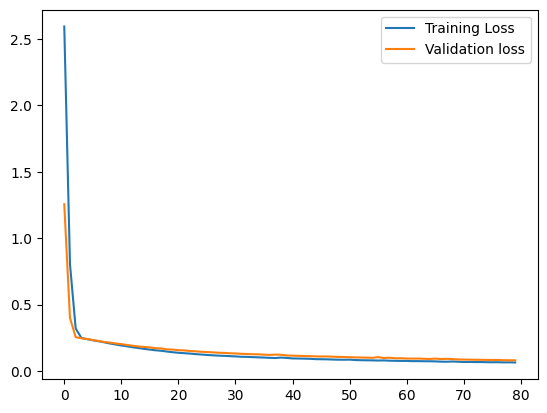

In [ ]:
# Plot loss per iteration
plt.plot(r.history["loss"], label="Training Loss")
plt.plot(r.history["val_loss"], label="Validation loss")
plt.legend()
plt.show()

In [ ]:
# Forecast future values
validation_target = Y[-N//2:]
validation_predictions = []

# Last train input
last_x = X[-N//2]

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, -1))[0, 0] # 1x1 array

  # Update predictions list
  validation_predictions.append(p)

  # Make the new input
  last_x = np.roll(last_x, -1) # shift everything one spot to the left, we replace it with the latest forecasted prediction. Multi-step predictions.
  last_x[-1] = p

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━

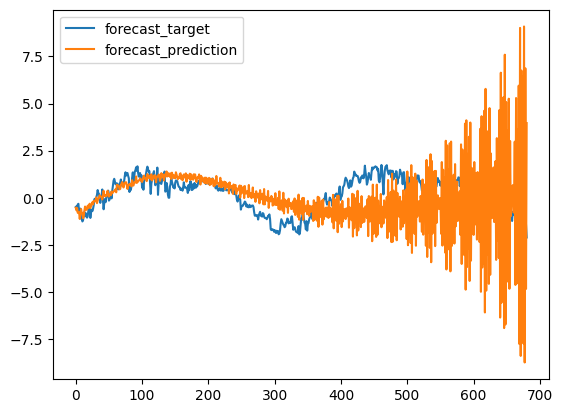

In [ ]:
plt.plot(validation_target, label="forecast_target")
plt.plot(validation_predictions, label="forecast_prediction")
plt.legend()
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import SimpleRNN, LSTM
from tensorflow.keras.optimizers import RMSprop
from keras.utils import plot_model

RNN

In [ ]:
num_units = 128
num_features = 4
num_dense = 64
lr = 0.001

modelRNN = Sequential()
modelRNN.add(SimpleRNN(units=num_units, input_shape=(1,num_features), activation="relu"))
modelRNN.add(Dense(num_dense, activation="relu"))
modelRNN.add(Dense(1))
modelRNN.compile(loss='mean_squared_error', optimizer=RMSprop(learning_rate=lr),metrics=['mse'])
modelRNN.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 128)                 │          17,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,345 (99.00 KB)

 Trainable params: 25,345 (99.00 KB)

 Non-trainable params: 0 (0.00 B)

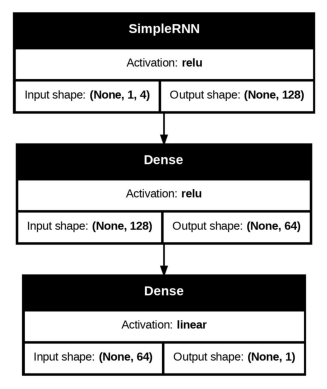

In [ ]:
RNN_img_file = '/tmp/model_1.jpg'

plot_model(
    modelRNN,
    to_file=RNN_img_file,
    show_shapes=True,
    show_layer_activations=True,
)

RNN_img = plt.imread(RNN_img_file)
plt.axis('off')
plt.imshow(RNN_img)
plt.show()

LSTM

In [ ]:
modelLSTM = Sequential()
modelLSTM.add(LSTM(num_units, input_shape=(1,num_features), return_sequences=True, activation="relu"))
modelLSTM.add(Dense(num_dense, activation="relu"))
modelLSTM.add(Dense(1))
modelLSTM.compile(loss='mean_squared_error', optimizer=RMSprop(learning_rate=lr),metrics=['mse'])
modelLSTM.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 1, 128)              │          68,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1, 64)               │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1, 1)                │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 76,417 (298.50 KB)

 Trainable params: 76,417 (298.50 KB)

 Non-trainable params: 0 (0.00 B)

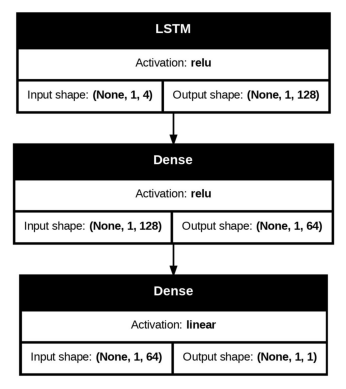

In [ ]:
LSTM_img_file = '/tmp/model_2.jpg'

plot_model(
    modelLSTM,
    to_file=LSTM_img_file,
    show_shapes=True,
    show_layer_activations=True,
)

LSTM_img = plt.imread(LSTM_img_file)
plt.axis('off')
plt.imshow(LSTM_img)
plt.show()

In [ ]:
#Creating dataset for model training
df = climate_data_clean
train_split = 0.8
# Split the data into training and testing sets
train_size = int(len(df) * train_split)
dl_train, dl_test = df.iloc[:train_size], df.iloc[train_size:]
print(len(dl_train), len(dl_test))

# Normalizing data with min-max scaling
from sklearn.preprocessing import MinMaxScaler
# code based on this example : https://www.kaggle.com/code/humagonen/time-series-arima-sarima-prophet-rnn-lstm-gru/notebook#--9)-SimpleRNN-Model-
# Initialize the MinMaxScaler
minmax_scaler = MinMaxScaler()

dl_train[['meantemp', 'humidity', 'wind_speed', 'meanpressure']] = minmax_scaler.fit_transform(dl_train[['meantemp', 'humidity', 'wind_speed', 'meanpressure']])
dl_test[['meantemp', 'humidity', 'wind_speed', 'meanpressure']] = minmax_scaler.transform(dl_test[['meantemp', 'humidity', 'wind_speed', 'meanpressure']])

# Creating data set
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)


sequence_length = 4
X_train, y_train = create_dataset(dl_train, dl_train['meantemp'], sequence_length)
X_test, y_test = create_dataset(dl_test, dl_test['meantemp'], sequence_length)

1169 293


<ipython-input-22-32b569f71c80>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dl_train[['meantemp', 'humidity', 'wind_speed', 'meanpressure']] = minmax_scaler.fit_transform(dl_train[['meantemp', 'humidity', 'wind_speed', 'meanpressure']])
<ipython-input-22-32b569f71c80>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dl_test[['meantemp', 'humidity', 'wind_speed', 'meanpressure']] = minmax_scaler.transform(dl_test[['meantemp', 'humidity', 'wind_speed', 'meanpressure']])


In [ ]:
# Transformer model building code from example: https://github.com/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_10_5_keras_transformers.ipynb

from tensorflow import keras
from tensorflow.keras import layers

# function to define transformer nn architecture
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res

# function to build transformer nn
def build_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    inputs = keras.Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(1)(x)
    return keras.Model(inputs, outputs)


In [ ]:
# Transformer model parameters and model setup

# Parameters
sequence_length = 4  #  time steps
num_features = 4
input_shape = (sequence_length, num_features)
head_size = 4  #  head size
num_heads = 2 # number of heads
ff_dim = 4  # feed-forward dimension
num_transformer_blocks = 1  #  transformer block number
mlp_units = [32]  # dense layers mlp
dropout = 0.1  # dropout transformer
mlp_dropout = 0.1  # dropout in mlp

# Building the tranformer model
modelTransformer = build_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout,
    mlp_dropout,
)


In [ ]:
# Compile transformer model
modelTransformer.compile(
    loss="mean_squared_error",
    optimizer=keras.optimizers.Adam(learning_rate=1e-4)
)
modelTransformer.summary()


Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8             │ (None, 4, 4)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_10    │ (None, 4, 4)           │              8 │ input_layer_8[0][0]    │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_6    │ (None, 4, 4)           │            156 │ layer_normalization_1… │
│ (MultiHeadAttention)      │                        │                │ layer_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_20 (Dropout)      │ (None, 4, 4)           │              0 │ multi_head_attention_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_10 (Add)              │ (None, 4, 4)           │              0 │ dropout_20[0][0],      │
│                           │                        │                │ input_layer_8[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_11    │ (None, 4, 4)           │              8 │ add_10[0][0]           │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_10 (Conv1D)        │ (None, 4, 4)           │             20 │ layer_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_21 (Dropout)      │ (None, 4, 4)           │              0 │ conv1d_10[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_11 (Conv1D)        │ (None, 4, 4)           │             20 │ dropout_21[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_11 (Add)              │ (None, 4, 4)           │              0 │ conv1d_11[0][0],       │
│                           │                        │                │ add_10[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling1d… │ (None, 4)              │              0 │ add_11[0][0]           │
│ (GlobalAveragePooling1D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_13 (Dense)          │ (None, 32)             │            160 │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_22 (Dropout)      │ (None, 32)             │              0 │ dense_13[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_14 (Dense)          │ (None, 1)              │             33 │ dropout_22[0][0]       │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 405 (1.58 KB)

 Trainable params: 405 (1.58 KB)

 Non-trainable params: 0 (0.00 B)

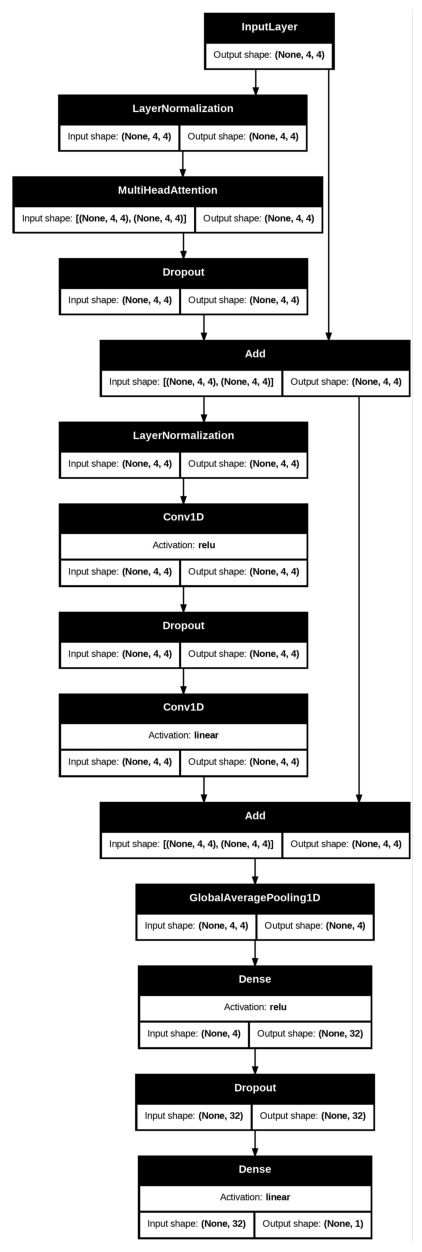

In [ ]:
TNN_img_file = '/tmp/model_3.jpg'

plot_model(
    modelTransformer,
    to_file=TNN_img_file,
    show_shapes=True,
    show_layer_activations=True,
)

plt.figure(figsize=(16, 16))
TNN_img = plt.imread(TNN_img_file)
plt.axis('off')
plt.imshow(TNN_img)
plt.show()